# 4 - Clustering - Censo USA


In [1]:
%matplotlib inline  

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plots 

pd.options.display.max_columns = 100
plt.rcParams['figure.figsize'] = (10, 6)

## Funcionamiento kmeans

http://fromdatawithlove.thegovans.us/2013/05/clustering-using-scikit-learn.html

kmean asigna cada observación a uno de los k grupos. El valor k debe ser especificado a priori. 

El algoritmo original elige k observaciones al azar como centroides y asigna cada observación al centroide más cercano. Después recalcula el centroide para que esté en el 'centro' del grupo y vuelve iterar.



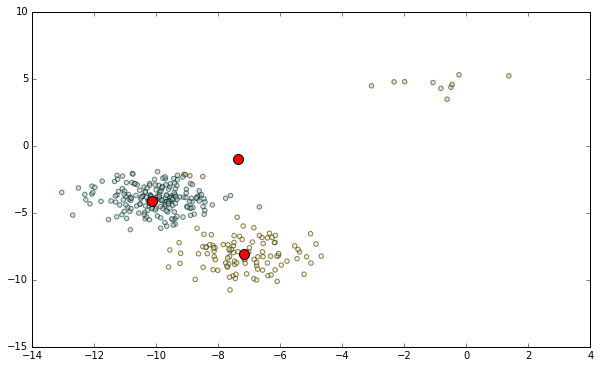

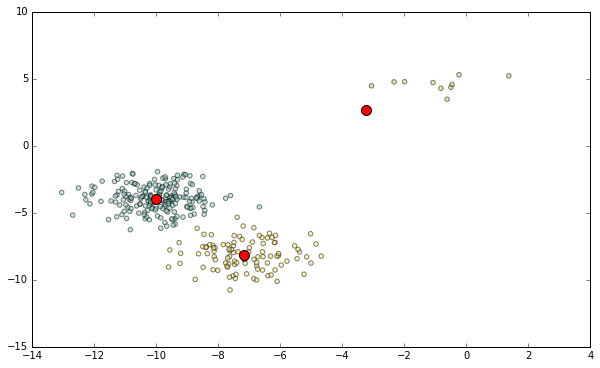

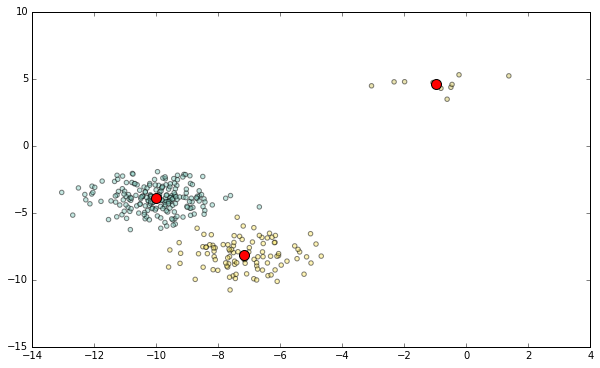

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=1000, random_state=1)
X_filtered = np.vstack((X[y == 0][:10], X[y == 1][:200], X[y == 2][:101]))

X_varied, y_varied = make_blobs(n_samples=100,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=1)

for i in range(1,4):
    kmeans = KMeans(n_clusters=3, random_state=7,max_iter= i, init='random')
    kmeans.fit(X_filtered)
    y_pred = kmeans.predict(X_filtered)
    # plot the data observations
    fig = plt.figure()

    ax = fig.add_subplot(111)
    
    ax.scatter(X_filtered[:,0],X_filtered[:,1],c=y_pred,cmap=plt.cm.Set3, marker='o', alpha=0.5)
    # plot the centroids
    i=0
    for centroid in kmeans.cluster_centers_:
        i=i+1
        ax.scatter(centroid[0],centroid[1],marker='o',c='r',s=100)
        # ax.text(centroid[0],centroid[1], str(i))
        #ax2.scatter(centers[:, 0], centers[:, 1],marker='o', c="white", alpha=1, s=200)
plt.show()

kmeans asume que los datos están distribuidos de una cierta manera, y que el número de clusters es conocido de antemano. 

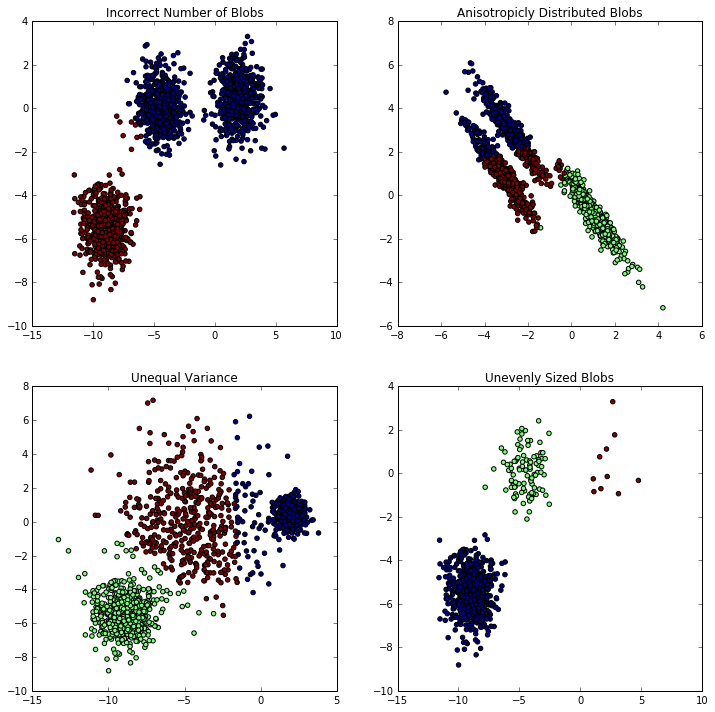

In [3]:
# http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#example-cluster-plot-kmeans-assumptions-py

from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

# Clasificando personas

http://archive.ics.uci.edu/ml/datasets/US+Census+Data+%281990%29

In [4]:
full_census = pd.read_csv("data/USCensus1990.data.txt", nrows=100000)
full_census.describe()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,iFeb55,iFertil,dHispanic,dHour89,dHours,iImmigr,dIncome1,dIncome2,dIncome3,dIncome4,dIncome5,dIncome6,dIncome7,dIncome8,dIndustry,iKorean,iLang1,iLooking,iMarital,iMay75880,iMeans,iMilitary,iMobility,iMobillim,dOccup,iOthrserv,iPerscare,dPOB,dPoverty,dPwgt1,iRagechld,dRearning,iRelat1,iRelat2,iRemplpar,iRiders,iRlabor,iRownchld,dRpincome,iRPOB,iRrelchld,iRspouse,iRvetserv,iSchool,iSept80,iSex,iSubfam1,iSubfam2,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,59999.500000,3.855180,3.271090,1.573470,0.122820,0.291490,1.230700,1.37468,1.429670,1.463140,0.212530,0.018570,1.186020,0.143880,1.566850,1.379110,0.456090,0.888140,0.049350,0.011020,0.198250,0.141890,0.032740,0.068040,0.042180,3.891990,0.021100,1.724280,0.54287,1.893780,0.010630,0.847190,2.80623,1.340450,1.518930,1.760760,0.001540,1.516910,0.28556,1.829300,1.121960,1.800350,1.47394,1.739830,0.076890,35.705390,0.476440,2.232840,0.237890,1.866980,16.957490,0.257640,2.135320,0.75836,1.251070,0.016100,0.515210,0.062980,0.028130,0.807880,1.472560,0.033470,0.823010,1.003480,1.099180,0.038450,8.42668,1.836810,0.139230
std,28867.657797,2.057297,4.023099,1.695456,0.677466,0.971233,1.761087,1.75240,0.845388,0.847507,0.652461,0.135001,1.871548,0.910355,1.728375,1.746573,1.711514,1.091256,0.216599,0.104397,0.398683,0.348939,0.177956,0.251816,0.201001,3.751211,0.143718,0.592842,0.87159,1.874981,0.102553,2.010169,1.68719,0.613439,0.831618,2.028365,0.039213,0.831662,0.97844,0.430306,0.709768,1.874125,1.54511,2.597889,0.736616,65.590653,0.713043,2.407497,0.425794,1.471403,11.614195,0.437337,2.205597,2.33892,0.597961,0.125861,0.499771,0.398817,0.172218,1.316559,1.966303,0.179861,0.859006,0.687817,0.746558,0.192281,4.09364,2.123847,0.403493
min,10000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,34999.750000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,2.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1

In [5]:
# iRemplpar => situacion laboral de los padres
# iImmigr => anhos de inmigración 
# iYearsch => anhos de escolarización
# los atributos están categorizados, con los valores ordenados

census = full_census [['iRemplpar','iImmigr','iYearsch']]

census.describe()

,iRemplpar,iImmigr,iYearsch
count,100000.000000,100000.000000,100000.00000
mean,35.705390,0.456090,8.42668
std,65.590653,1.711514,4.09364
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,5.00000
50%,0.000000,0.000000,10.00000
75%,111.000000,0.000000,11.00000
max,223.000000,10.000000,17.00000


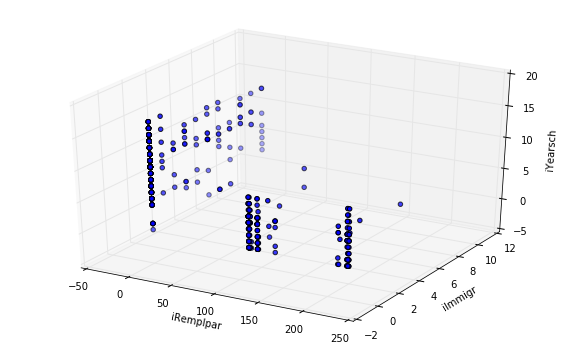

In [6]:
from mpl_toolkits.mplot3d import axes3d, Axes3D 

sample = census.sample (n=1000)  
sample.describe()

def show_3d (x,y,z,xlabel, ylabel, zlabel, c='b'):
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c=c)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

    plt.show()
    
    
show_3d (sample.iRemplpar, sample.iImmigr, sample.iYearsch, 'iRemplpar','iImmigr','iYearsch')

kmeans es no determinista, y el resultado depende de los valores iniciales elegidos como centroides

In [7]:
kmeans = KMeans(init='random', n_clusters=3, n_init=1)


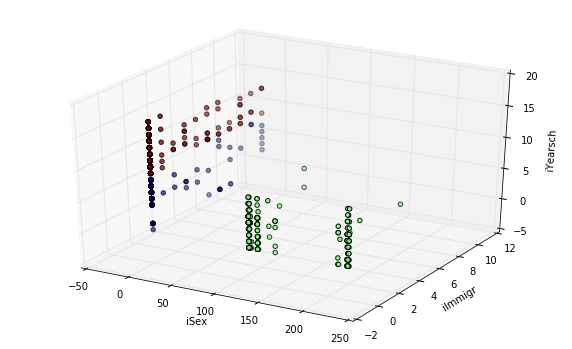

In [8]:
kmeans.fit(sample)  
show_3d (sample.iRemplpar, sample.iImmigr, sample.iYearsch, 'iSex','iImmigr','iYearsch', c=kmeans.labels_)

## Eligiendo el número de clusters

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

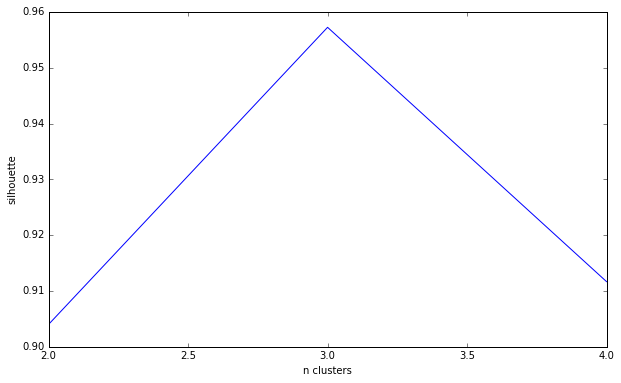

In [9]:
from sklearn import metrics

silhouettes = []

for n_clusters in range (2,5):
    kmeans = KMeans( n_clusters=n_clusters, n_init=10)
    labels = kmeans.fit_predict(sample)
    silhouette_avg = metrics.silhouette_score(sample, labels)
    silhouettes.append(silhouette_avg)

    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('n clusters')
ax.set_ylabel('silhouette')

    
ax.plot (range (2,5), silhouettes)


Qué pasa si usamos todos los atributos?
Tiempo de ejecución > 2 min.

CPU times: user 1min 9s, sys: 2.19 s, total: 1min 11s
Wall time: 56.4 s


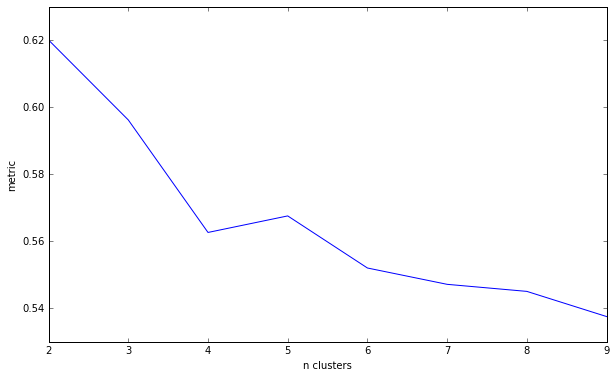

In [11]:
from sklearn.cluster import MiniBatchKMeans

import warnings
warnings.filterwarnings('ignore')

def plot_metrics(data, min, max):
    silhouettes = []
    n_clusters_range = range (min,max)
    for n_clusters in n_clusters_range:
        kmeans = MiniBatchKMeans(n_clusters=n_clusters,
                                 n_init=10)
        labels = kmeans.fit_predict(data)
        silhouette_avg = metrics.silhouette_score(data, labels)
        silhouettes.append(silhouette_avg)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('n clusters')
    ax.set_ylabel('metric')

    ax.plot (n_clusters_range, silhouettes)
    
full_census_sample= full_census.sample (5000)

%time plot_metrics (full_census_sample, 2,10)